# Churn
- Predict the person will person churn (exit) or not

In [2]:
import numpy as np
import pandas as pd

In [3]:
df = pd.read_csv('Churn_Modelling.csv')
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


# Data Exploration

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [6]:
df["Exited"].value_counts()

Exited
0    7963
1    2037
Name: count, dtype: int64

# Data Preprocessing

In [8]:
df.drop(columns=["RowNumber","CustomerId","Surname"], inplace=True)
df

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [9]:
df ['Geography'].value_counts()

Geography
France     5014
Germany    2509
Spain      2477
Name: count, dtype: int64

In [10]:
df ['Gender'].value_counts()

Gender
Male      5457
Female    4543
Name: count, dtype: int64

In [11]:
df.isnull().sum()

CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [12]:
X =pd.get_dummies(df.drop('Exited', axis=1),drop_first=True)
y = df['Exited']

In [13]:
X

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,False,False,False
1,608,41,1,83807.86,1,0,1,112542.58,False,True,False
2,502,42,8,159660.80,3,1,0,113931.57,False,False,False
3,699,39,1,0.00,2,0,0,93826.63,False,False,False
4,850,43,2,125510.82,1,1,1,79084.10,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,39,5,0.00,2,1,0,96270.64,False,False,True
9996,516,35,10,57369.61,1,1,1,101699.77,False,False,True
9997,709,36,7,0.00,1,0,1,42085.58,False,False,False
9998,772,42,3,75075.31,2,1,0,92888.52,True,False,True


In [14]:
### Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [15]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [16]:
X_train.shape

(8000, 11)

# Modelling
- Initializing the Artificial Neural Network

In [18]:
import tensorflow as tf
import keras

In [19]:
from keras.models import Sequential
from keras. layers import Dense

In [20]:
ann = Sequential()
ann.add(Dense(input_dim = 11, units = 22, kernel_initializer = 'uniform', activation = 'relu'))
ann.add(Dense(units = 1, kernel_initializer = 'uniform', activation = 'sigmoid'))
ann.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

C:\Users\Lenovo\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


**for binary class**

- units/no.of neurons of output layer = 1
- activation funcion of output layer ="sigmoid"
- loss = "binary_crossentropy"

**for multi class**

- units/no.of neurons of output layer = no.of categories in output variable
- activation funcion of output layer ="softmax"
- loss = "categorical_crossentropy"

**Training the ANN on the Training set**

In [23]:
ann.fit(X_train, y_train, batch_size = 32, epochs = 100)

Epoch 1/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.7927 - loss: 0.5917
Epoch 2/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7981 - loss: 0.4376
Epoch 3/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7927 - loss: 0.4281
Epoch 4/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.7995 - loss: 0.4208
Epoch 5/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8253 - loss: 0.4111
Epoch 6/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8284 - loss: 0.4134
Epoch 7/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8201 - loss: 0.4229
Epoch 8/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8268 - loss: 0.4254
Epoch 9/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8310 - loss: 0.4120
Epoch 10/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8342 - loss: 0.4071
Epoch 11/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8387 - loss: 0.4022
Epoch 12/100
250/250 ━━━━━━━━━━━━━━━━━━━━

# Predictions & Evaluating the model

- **Predictions**

In [25]:
y_pred_train = ann.predict(X_train)
y_pred_train = (y_pred_train >= 0.5)

y_pred_test = ann.predict(X_test)
y_pred_test= (y_pred_test >= 0.5)

250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


- **Evaluation**

In [27]:
from sklearn.metrics import confusion_matrix, accuracy_score

print("Test Accuracy:", accuracy_score(y_test, y_pred_test))
print("Train Accuracy:", accuracy_score(y_train, y_pred_train))

Test Accuracy: 0.8665
Train Accuracy: 0.871125


In [28]:
confusion_matrix(y_test, y_pred_test)

array([[1529,   66],
       [ 201,  204]], dtype=int64)

# Cross Validate the Model

In [ ]:
def build_cross_classifier():
    classifier = Sequential()
    classifier.add(Dense(input_dim = 11, units = 22, kernel_initializer = 'uniform', activation = 'relu'))
    classifier.add(Dense(units = 1, kernel_initializer = 'uniform', activation = 'sigmoid'))
    classifier.compile(optimizer = "adam", loss = 'binary_crossentropy', metrics = ['accuracy'])
    return classifier

from scikeras.wrappers import KerasClassifier
classifier = KerasClassifier(build_cross_classifier(),batch_size=32,epochs=100)

In [ ]:
pip install scikeras

In [ ]:
from sklearn.model_selection import cross_val_score

cv = cross_val_score(classifier, X_train, y_train, cv = 5,scoring="accuracy").mean()

print(cv)

# Improving and Tuning the ANN
**This can be done by using 3 options**

- 1.Hyperparameter Tuning
- 2.Regularization (L1 & L2) to reduce overfitting if needed (for Regression problems)
- 3.Dropout

**Hyperparameter tuning can be done for identifying no.of hidden layers & no.of neurons in each hidden layer**
- layers = [[20],[10],[30],[40]] -- > 1 hidden layer with different options of no.of neurons in that hidden layer
- layers = [[20],[40,20],[45,30,15]] -- > Multiple hidden layers with different options of no.of neurons

**Hyperparameter tuning can be done for identifying best activation function for hidden layers**
- activations=['relu','sigmoid']

**Hyperparameter tuning can be done for identifying best optimizers**
- optimizer =['adam','rmsprop']

**Hyperparameter tuning can be done for identifying best batchsize for building/training model**
- batch_size =[10,16,32,64,128,256]

In [ ]:
estimator = KerasClassifier(build_cross_classifier())

param_grid = {'batch_size': [8,16], 'epochs': [100,150]}

# Next time do this
# param_grid = {'batch_size': [32,64], 'epochs': [100,150]}

In [ ]:
from sklearn.model_selection import GridSearchCV

grid = GridSearchCV(estimator, param_grid, scoring = 'accuracy', cv = 5)

grid_result = grid. fit(X_train, y_train)

In [ ]:
#best parameters
grid_result.best_params

In [ ]:
#best accuracy
grid_result.best_score

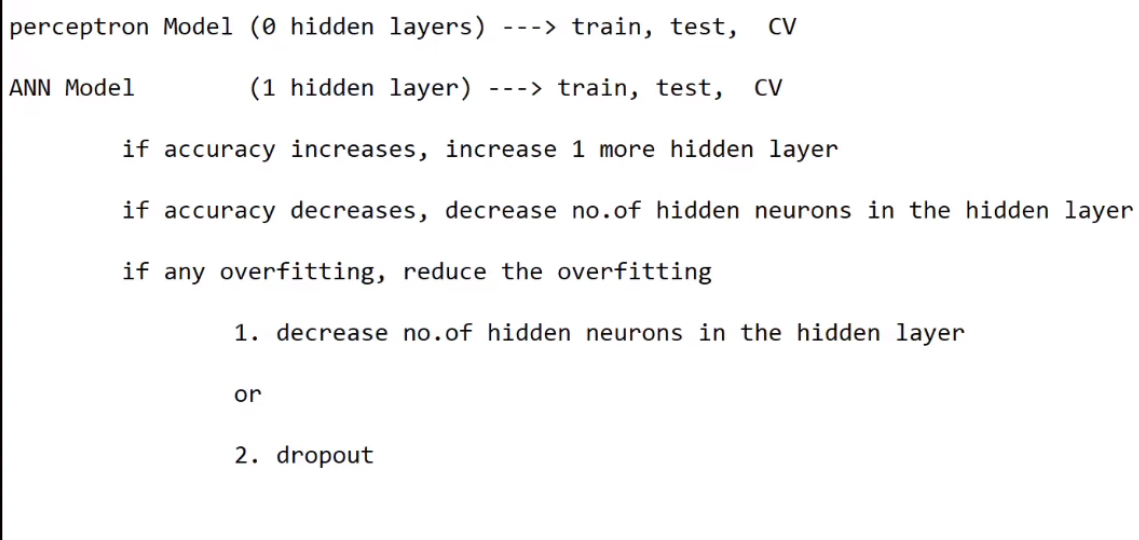

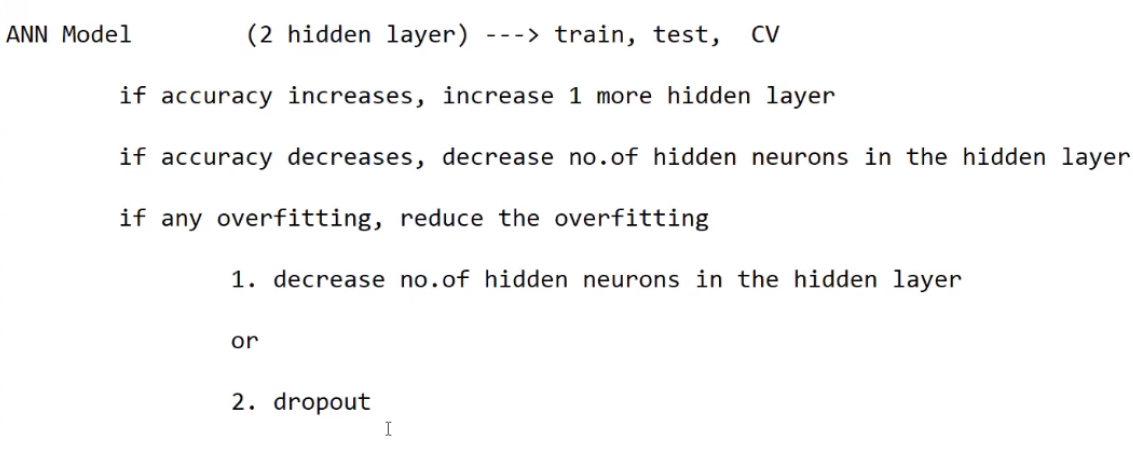

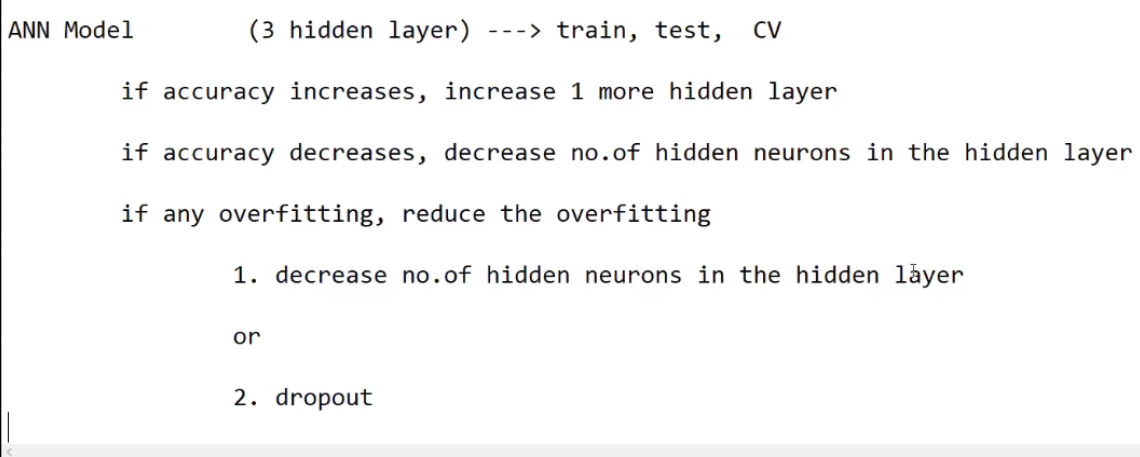

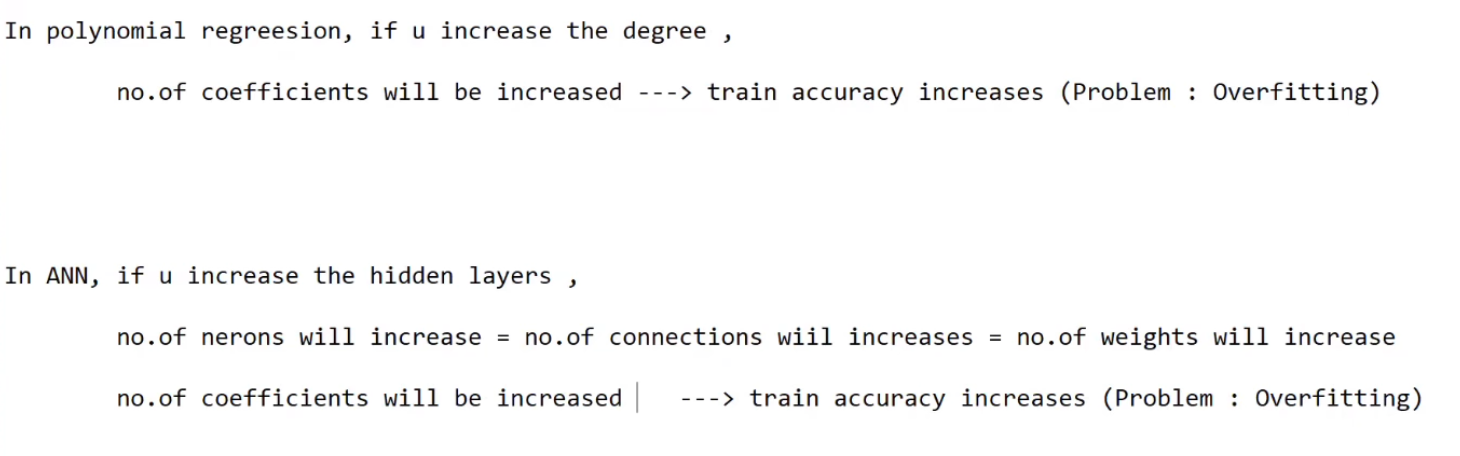

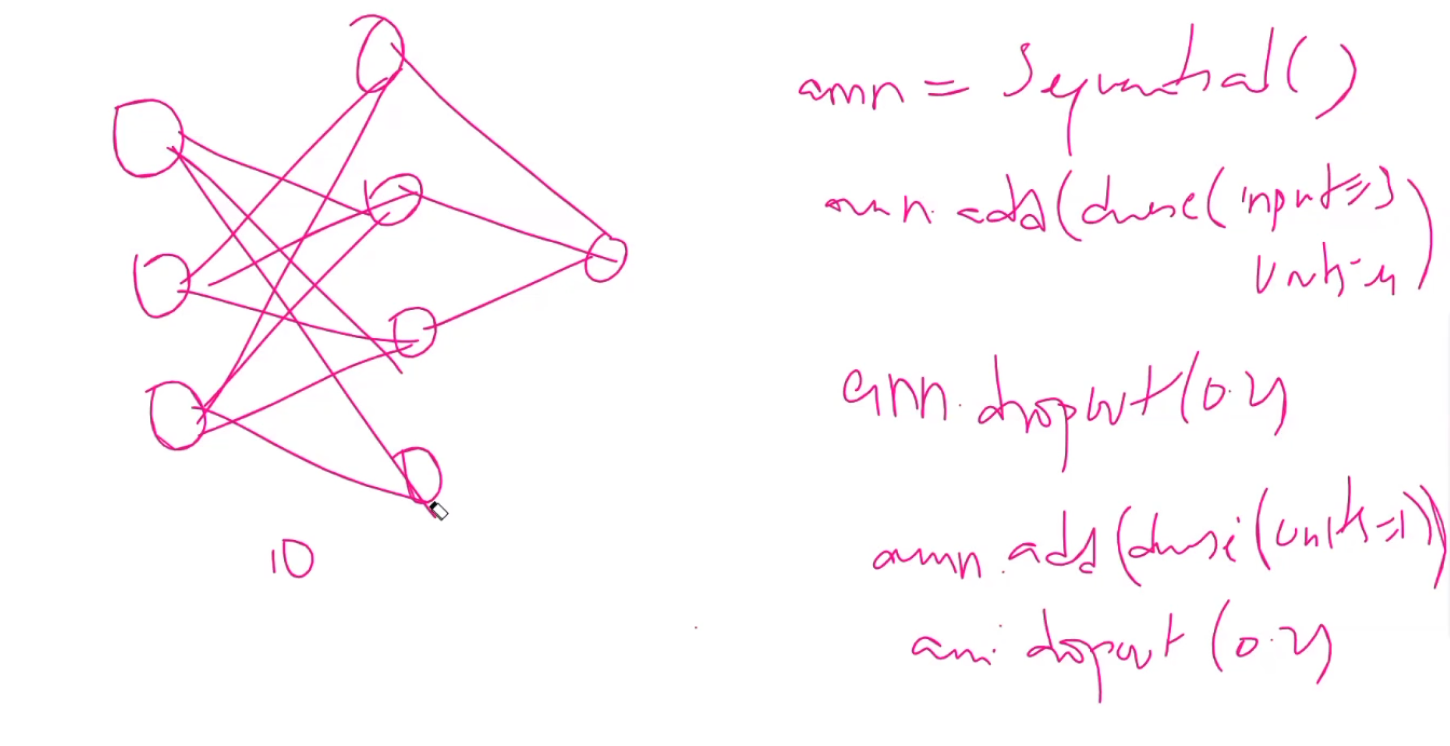